In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import chainer
import chainer.links as L
import chainer.functions as F
from chainer.training import extensions

import os

In [2]:
def train_test_tuple_dataset(x,y,test_ratio):
    """Make training & testing data set.

    Args:
        x([numpy]ndarray):Input series
        y([numpy]ndarray):Output series
        test_ratio(float):Test data ratio in (0,1)
    """
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = test_ratio)
    train = chainer.datasets.TupleDataset(x_train, y_train)
    test = chainer.datasets.TupleDataset(x_test, y_test)
    return train,test

#高橋自作
def train_test_tuple_dataset2(x,y,test_data_size):
    """Make training & testing data set.

    Args:
        x([numpy]ndarray):Input series
        y([numpy]ndarray):Output series
        test_ratio(float):Test data ratio in (0,1)
    """
    #x_train, x_test, y_train, y_test = train_test_split(x,y,
    #                                                    test_size = test_ratio,
    #                                                    random_state=True)
    x_train=[]
    y_train=[]
    x_test=[]
    y_test=[]
    i=0
    for i in range(len(x)-test_data_size):
        x_train.append(x[i])
        y_train.append(y[i])
    for i in range(test_data_size):
        x_test.append(x[len(x)-test_data_size+i])
        y_test.append(y[len(y)-test_data_size+i])
   
    train = chainer.datasets.TupleDataset(np.array(x_train), np.array(y_train))
    test = chainer.datasets.TupleDataset(np.array(x_test), np.array(y_test))
    return train,test

In [3]:
#define csv file
os.chdir("C:\\Users\\Owner\\Desktop\\ML\\6_Data File\\3_boat data")
data_csv_file = "boat_data.csv"

In [4]:
#input columns' name
x_columns = [
    #'1-odds', '2-odds', '3-odds', '4-odds','5-odds','6-odds',
    'Place', '6th-num', '5th-num',
    '4th-num',  '3rd-num', '2nd-num',
    '1st-num', '6th-ratio', '5th-ratio', '4th-ratio',
    '3rd-ratio', '2nd-ratio', '1st-ratio', '6th-ratio2', '5th-ratio2',
    '4th-ratio2', '3rd-ratio2', '2nd-ratio2', '1st-ratio2', '6th-ratioj',
    '5th-ratioj', '4th-ratioj', '3rd-ratioj', '2nd-ratioj', '1st-ratioj',
    '6th-ratioj2', '5th-ratioj2', '4th-ratioj2', '3rd-ratioj2',
    '2nd-ratioj2', '1st-ratioj2', 
    '6th-mratio', '5th-mratio', '4th-mratio',
    '3rd-mratio', '2nd-mratio', '1st-mratio', '6th-bratio', '5th-bratio',
    '4th-bratio', '3rd-bratio', '2nd-bratio', '1st-bratio', 
    '1st-exb','2nd-exb','3rd-exb','4th-exb','5th-exb','6th-exb',
    #'(1, 2, 3)', '(1, 2, 4)', '(1, 2, 5)', '(1, 2, 6)',
    #'(1, 3, 2)', '(1, 3, 4)', '(1, 3, 5)', '(1, 3, 6)', '(1, 4, 2)',
    #'(1, 4, 3)', '(1, 4, 5)', '(1, 4, 6)', '(1, 5, 2)', '(1, 5, 3)',
    #'(1, 5, 4)', '(1, 5, 6)', '(1, 6, 2)', '(1, 6, 3)', '(1, 6, 4)',
    #'(1, 6, 5)', '(2, 1, 3)', '(2, 1, 4)', '(2, 1, 5)', '(2, 1, 6)',
    #'(2, 3, 1)','(2, 3, 4)', '(2, 3, 5)', '(2, 3, 6)', '(2, 4, 1)', '(2, 4, 3)',
    #'(2, 4, 5)', '(2, 4, 6)', '(2, 5, 1)', '(2, 5, 3)', '(2, 5, 4)',
    #'(2, 5, 6)', '(2, 6, 1)', '(2, 6, 3)', '(2, 6, 4)', '(2, 6, 5)',
    #'(3, 1, 2)', '(3, 1, 4)', '(3, 1, 5)', '(3, 1, 6)', '(3, 2, 1)',
    #'(3, 2, 4)', '(3, 2, 5)', '(3, 2, 6)', '(3, 4, 1)', '(3, 4, 2)',
    #'(3, 4, 5)', '(3, 4, 6)', '(3, 5, 1)', '(3, 5, 2)', '(3, 5, 4)',
    #'(3, 5, 6)', '(3, 6, 1)', '(3, 6, 2)', '(3, 6, 4)', '(3, 6, 5)',
    #'(4, 1, 2)', '(4, 1, 3)', '(4, 1, 5)', '(4, 1, 6)', '(4, 2, 1)',
    #'(4, 2, 3)', '(4, 2, 5)', '(4, 2, 6)', '(4, 3, 1)', '(4, 3, 2)',
    #'(4, 3, 5)', '(4, 3, 6)', '(4, 5, 1)', '(4, 5, 2)', '(4, 5, 3)',
    #'(4, 5, 6)', '(4, 6, 1)', '(4, 6, 2)', '(4, 6, 3)', '(4, 6, 5)',
    #'(5, 1, 2)', '(5, 1, 3)', '(5, 1, 4)', '(5, 1, 6)', '(5, 2, 1)',
    #'(5, 2, 3)', '(5, 2, 4)', '(5, 2, 6)', '(5, 3, 1)', '(5, 3, 2)',
    #'(5, 3, 4)', '(5, 3, 6)', '(5, 4, 1)', '(5, 4, 2)', '(5, 4, 3)',
    #'(5, 4, 6)', '(5, 6, 1)', '(5, 6, 2)', '(5, 6, 3)', '(5, 6, 4)',
    #'(6, 1, 2)', '(6, 1, 3)', '(6, 1, 4)', '(6, 1, 5)', '(6, 2, 1)',
    #'(6, 2, 3)', '(6, 2, 4)', '(6, 2, 5)', '(6, 3, 1)', '(6, 3, 2)',
    #'(6, 3, 4)', '(6, 3, 5)', '(6, 4, 1)', '(6, 4, 2)', '(6, 4, 3)',
    #'(6, 4, 5)', '(6, 5, 1)', '(6, 5, 2)', '(6, 5, 3)', '(6, 5, 4)',
    '6th-rank','5th-rank','4th-rank','3rd-rank','2nd-rank','1st-rank',
]


#predict columns' name
y_columns = ['1-odds-cls']

#make data set
df = pd.read_csv(data_csv_file, sep=',')

xs = df[x_columns]
ys = df[y_columns]

In [5]:
#ｵｯｽﾞ2値分類化
df.loc[df['1-odds'] < 3, '1-odds-cls'] = 0
df.loc[~(df['1-odds'] < 3), '1-odds-cls'] = 1

print(df['1-odds-cls'])

0        1
1        0
2        0
3        0
4        0
5        1
6        1
7        1
8        1
9        0
10       0
11       0
12       0
13       1
14       1
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       1
28       0
29       0
        ..
86754    0
86755    0
86756    0
86757    0
86758    0
86759    0
86760    0
86761    0
86762    1
86763    0
86764    0
86765    0
86766    0
86767    0
86768    0
86769    0
86770    0
86771    0
86772    0
86773    0
86774    0
86775    0
86776    1
86777    1
86778    0
86779    0
86780    0
86781    0
86782    0
86783    0
Name: 1-odds-cls, Length: 86784, dtype: int64


In [6]:
#Data Setting
x_train = []
y_train = []
print("Start Data Setting")
for s in range(50000,55000):
    if s % 100 == 0:
        print(s)
    x_train.append(df[x_columns].iloc[s])
    y_train.append(df[y_columns].iloc[s])



Start Data Setting
50000
50100
50200
50300
50400
50500
50600
50700
50800
50900
51000
51100
51200
51300
51400
51500
51600
51700
51800
51900
52000
52100
52200
52300
52400
52500
52600
52700
52800
52900
53000
53100
53200
53300
53400
53500
53600
53700
53800
53900
54000
54100
54200
54300
54400
54500
54600
54700
54800
54900


In [7]:
#ﾓﾃﾞﾙﾌｨｯﾃｨﾝｸﾞ
#print(x_train)
print("Starting model fitting")
rf = RandomForestClassifier(n_estimators = len(x_train), random_state=0)
#rf = RandomForestRegressor(n_estimators = len(x_train), random_state=0)
rf.fit(x_train, y_train)
print("Finishing model fitting")

Starting model fitting


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Finishing model fitting


In [8]:
df_test = df.iloc[len(df)-500:len(df)]

test_t = []
odds_1 = []
zyuni = []
test_y=[]

print("Setting test data")
for i in range(0,len(df_test)):
    if i%10 == 0:
        print(i)
    test_x = df_test[x_columns].iloc[i]
    #print(test_x)
    test_t.append(float(df_test['1-odds-cls'].iloc[i]))
    zyuni.append(float(df_test['1st'].iloc[i]))
    odds_1.append(float(df_test['1-odds'].iloc[i]))
    test_y.append(float(rf.predict(test_x.reshape(1,-1))))
    #test_y.append(float(rf.predict(test_x)))
print("Finishing prediction")

Setting test data
0


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
Finishing prediction


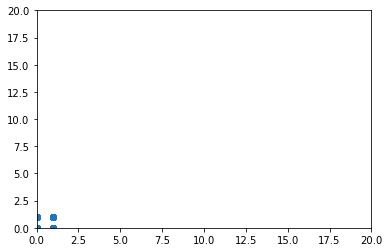

In [9]:
#plt.plot(test_t,test_y,label = 'act')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(test_t,test_y,vmin = 0, vmax = 100)
plt.xlim(0,20)
plt.ylim(0,20)
plt.show()

In [10]:
#正答率
for i in range(200):
    score = 0
    for j in range(100):
        if test_y[(i+1)*j] == test_t[(i+1)*j]:
            score = score + 1 
    print(score)

85
89
84
86
83


IndexError: list index out of range

In [ ]:
#オッズが分からなければ
balance = 10000
bet = 100
rireki = []
for i in range(len(test_y)):
    if test_y[i] == 1:
        balance = balance - bet
        if abs(zyuni[i]-1) < 0.1:
            balance = balance + bet*odds_1[i]
    rireki.append(balance)
df_y = pd.DataFrame(test_y)
df_t = pd.DataFrame(test_t)
df_odds = pd.DataFrame(odds_1)
df_1st = pd.DataFrame(zyuni)
df_rireki = pd.DataFrame(rireki)
df_yt = pd.concat([df_y,df_t,df_odds,df_1st,df_rireki],axis = 1)    
df_yt.to_csv("aaa.csv")
print(balance)

In [ ]:
#オッズが投票前に分かれば
balance = 10000
bet = 1000
rireki = []
for i in range(len(test_y)):
    if test_t[i] > 10:
        balance = balance - bet
        if abs(zyuni[i]-1) < 0.1:
            balance = balance + bet*test_t[i]
    rireki.append(balance)
df_y = pd.DataFrame(test_y)
df_t = pd.DataFrame(test_t)
df_1st = pd.DataFrame(zyuni)
df_rireki = pd.DataFrame(rireki)
df_yt = pd.concat([df_y,df_t,df_1st,df_rireki],axis = 1) 
df_yt.to_csv("aaa2.csv")
print(balance)

In [ ]:
def myplot_aux(model, tuple_dataset, y_scaler = None):
    x = np.array([_x for _x in np.array(tuple_dataset)[:,0]])
    t = np.array([_t for _t in np.array(tuple_dataset)[:,1]])
    
    y = model(x).data
    if y_scaler is not None:
        t = y_scaler.inverse_transform(t)
        y = y_scaler.inverse_transform(y)
        x = x_scaler.inverse_transform(x)
    return t, y, x
model.predictor
t, y, x = myplot_aux(model.predictor, train, y_scaler)
#y = np.round(y,0)
myplot(t, y, color = 'gray')
t, y, x = myplot_aux(model.predictor, test, y_scaler)
y = np.round(y,0)
myplot(t, y, color='green')

try:
    y_sch = df[y_columns].values
    p_sch = df[[col + 'sch' for col in y_columns]].values
    myplot(y_sch, p_sch)
except:
    pass

plt.show()

In [ ]:
####予想トップのオッズが１５倍以上にかける#####
score = 0

cash = 500000
kake = 10000
deposit = []

for i in range(len(t)):
    if abs(t[i][0] - y[i][0]) <= 0.2:
        score = score + 1
    if x[i][int(y[i][0]-1)] > 15:
        cash =cash -kake
        if abs(t[i][0] - y[i][0]) <= 0.2:
            if abs(t[i][0]-1) < 0.1:
                cash = cash + kake*x[i][0]
            elif abs(t[i][0]-2) < 0.1:
                cash = cash + kake*x[i][1]
            elif abs(t[i][0]-3) < 0.1:
                cash = cash + kake*x[i][2]
            elif abs(t[i][0]-4) < 0.1:
                cash = cash + kake*x[i][3]
            elif abs(t[i][0]-5) < 0.1:
                cash = cash + kake*x[i][4]
            elif abs(t[i][0]-6) < 0.1:
                cash = cash + kake*x[i][5]
    deposit.append(cash)
plt.plot(deposit)
plt.show()

print(score/len(t)*100)

In [ ]:
####予想トップが１ｺｰｽかつ１ｺｰｽ単勝ｵｯｽﾞが１．５倍以上のみ掛け#####
score = 0

cash = 50000
kake = 1000
deposit2 = []

for i in range(len(t)):
    if abs(t[i][0] - y[i][0]) <= 0.2:
        score = score + 1
    if abs(y[i][0]-1) < 0.1 and x[i][int(y[i][0]-1)] > 1.5:
        #kake = np.round(cash/5000,0)
        kake = cash/5000
        kake = kake*100
        cash =cash -kake
        if abs(t[i][0] - y[i][0]) <= 0.2:
            if abs(t[i][0]-1) < 0.1:
                cash = cash + kake*x[i][0]
            elif abs(t[i][0]-2) < 0.1:
                cash = cash + kake*x[i][1]
            elif abs(t[i][0]-3) < 0.1:
                cash = cash + kake*x[i][2]
            elif abs(t[i][0]-4) < 0.1:
                cash = cash + kake*x[i][3]
            elif abs(t[i][0]-5) < 0.1:
                cash = cash + kake*x[i][4]
            elif abs(t[i][0]-6) < 0.1:
                cash = cash + kake*x[i][5]
    deposit2.append([cash,kake])
plt.plot(deposit2)
plt.show()

print(score/len(t)*100)

In [ ]:
x1 =[]
x2 =[]
x3 =[]
x4 =[]
x5 =[]
x6 =[]
for i in range(len(t)):
    x1.append(x[i][0])
    x2.append(x[i][1])
    x3.append(x[i][2])
    x4.append(x[i][3])
    x5.append(x[i][4])
    x6.append(x[i][5])

df_t = pd.DataFrame(t)
df_y = pd.DataFrame(y)
df_1 = pd.DataFrame(x1)
df_2 = pd.DataFrame(x2)
df_3 = pd.DataFrame(x3)
df_4 = pd.DataFrame(x4)
df_5 = pd.DataFrame(x5)
df_6 = pd.DataFrame(x6)
df_d = pd.DataFrame(deposit)
df_d2 = pd.DataFrame(deposit2)

df = pd.concat([df_t,df_y,df_1,df_2,df_3,df_4,df_5,df_6,df_d2],axis=1)

df.columns = ['実績','予測','１オッズ','２オッズ','３オッズ','４オッズ',
             '５オッズ','６オッズ','財布','掛け金']

df.to_csv("boat_result_randomforest.csv")

In [ ]:
a = [[1,2,3],[4,2,1],[5,2,3],[3,2,3]]
a.reshape(1,-1)
print(a)

In [ ]:
]